*Goal:* We want to see what the general distribution of spot sizes is in pixels to pick our general spot size.

Outcome: 380 seems about right

In [9]:
import pickle
import glob
import matplotlib.pyplot as plt

In [8]:
# Get pickle from each sample that we made when patching (could also use `scalefactors_json.json`)
dict_paths = glob.glob("../patched_data/*/sample_data_dict.pickle")

sizes= []

for path in dict_paths:
    dict = pickle.load(open(path, "rb"))
    sizes += [dict['spot_diameter_fures']]

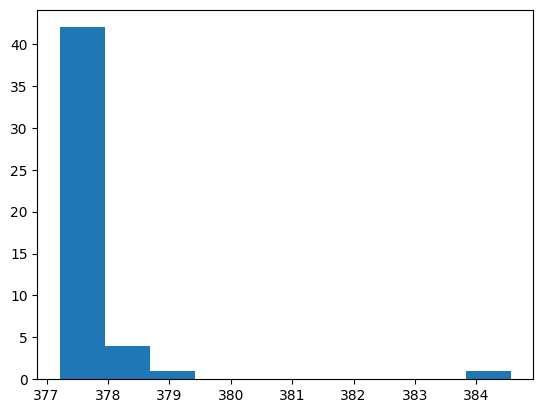

In [10]:
plt.hist(sizes)
plt.show()

We can see from the above that Kacper's original choice of 380 pixels for the spots of the model is well justified if we just want the area under the spot itself.

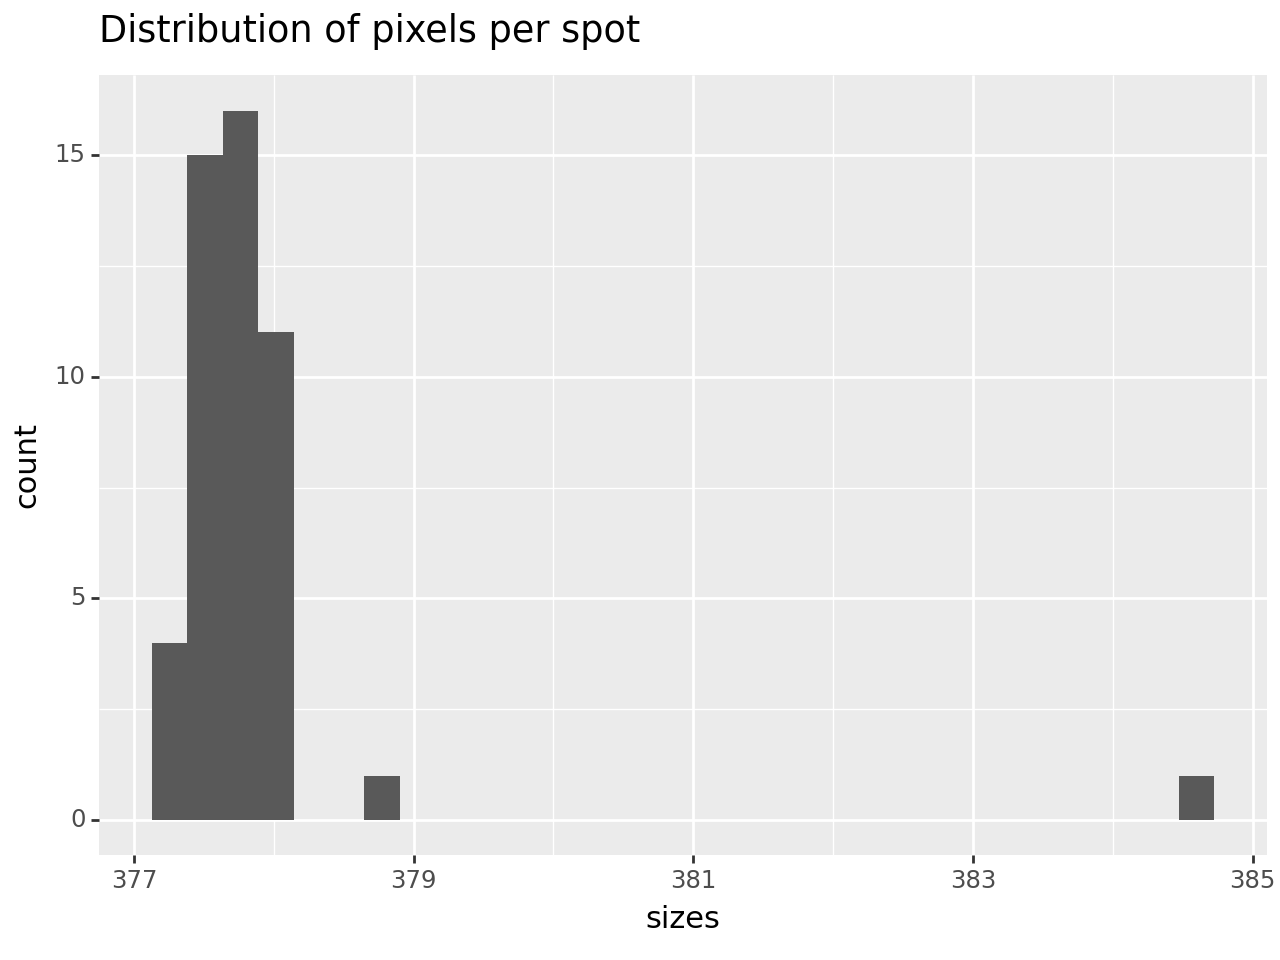

<Figure Size: (640 x 480)>

In [27]:
# R like implementation just to see

import plotnine
import pandas as pd
df_size = pd.DataFrame(data = sizes, columns = ["sizes"])

(plotnine.ggplot(df_size, plotnine.aes(x = "sizes")) + 
    plotnine.geoms.geom_histogram(bins = 30) +
    plotnine.labels.ggtitle("Distribution of pixels per spot"))

Now let us consider how big a maximum patch size we can get if we were to extend beyond the bounds of the spot alone.

Horizontal distance:

c:\Users\cbainton\AppData\Local\anaconda3\envs\tf\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


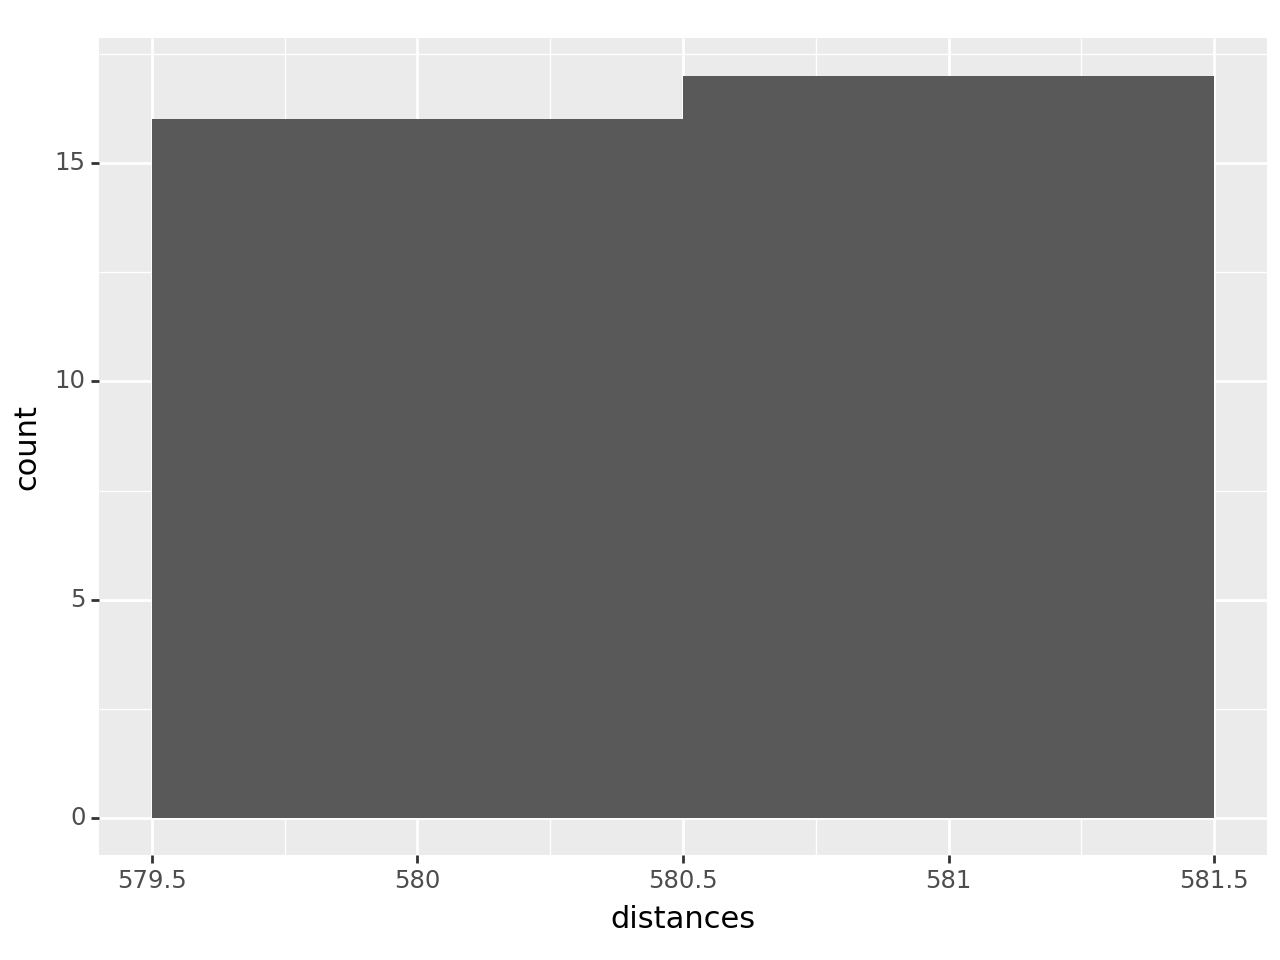

<Figure Size: (640 x 480)>

In [72]:
spot_pos_33a = pd.read_csv('..\patched_data\V10F03-033_A\spot_positions.csv')

on_row_0 = spot_pos_33a.loc[spot_pos_33a.loc[:,'array_row'] == 0, 'pxl_col_fures']

horizontal_distances = on_row_0.to_numpy()[1:] - on_row_0.to_numpy()[:-1]

horizontal =  pd.DataFrame(horizontal_distances, columns=['distances'])
(plotnine.ggplot(horizontal, plotnine.aes('distances')) + 
    plotnine.geoms.geom_histogram())

We can see that the distance between centers is about 580 pixels. Recall that this is technically the distance is two columns away on the array columns because of an isometric grid.

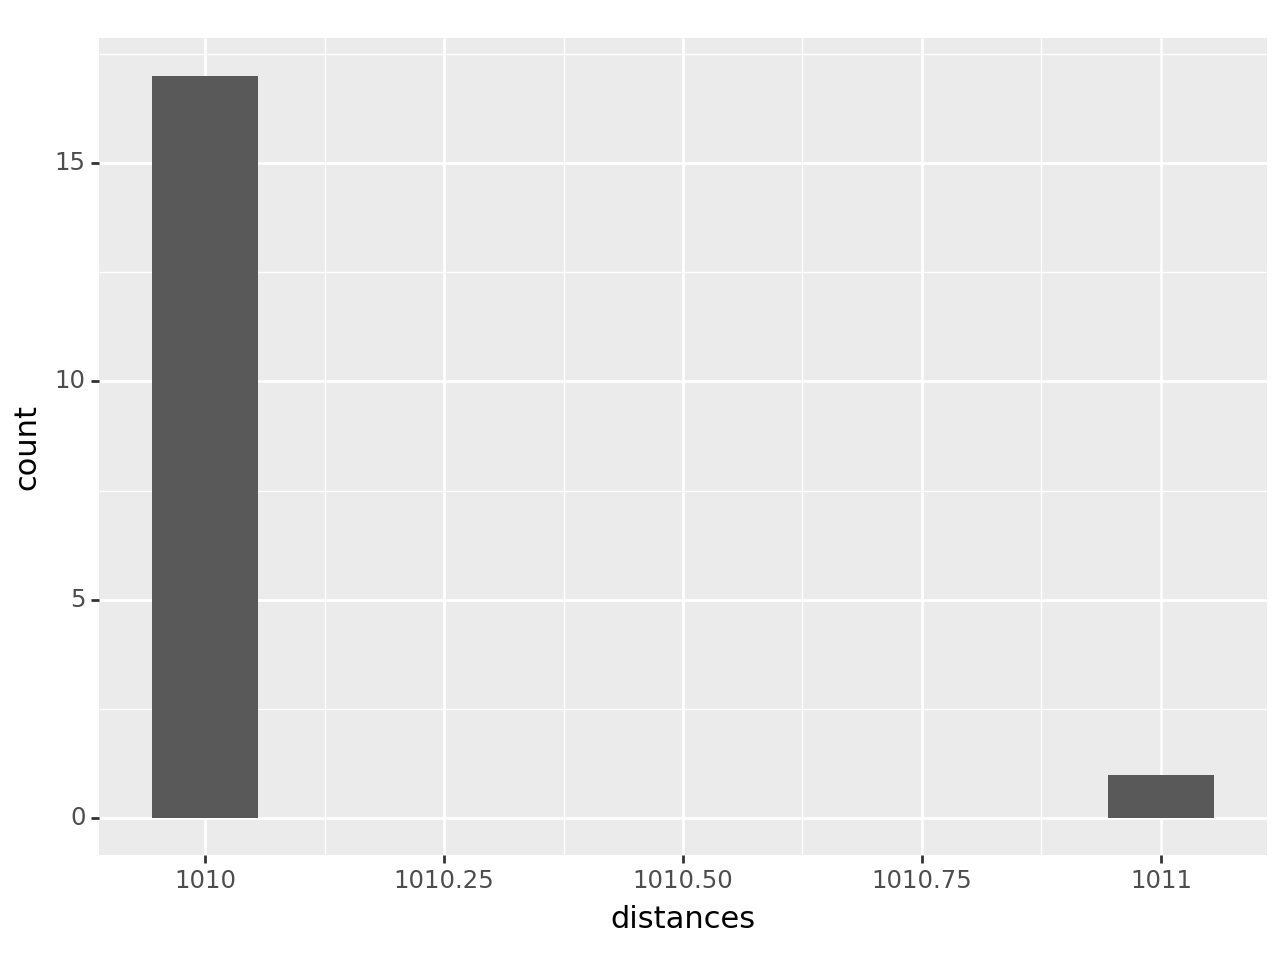

<Figure Size: (640 x 480)>

In [78]:
# spot_pos_33a = pd.read_csv('..\patched_data\V10F03-033_A\spot_positions.csv')

on_col_100 = spot_pos_33a.loc[spot_pos_33a.loc[:,'array_col'] == 100, 'pxl_row_fures']

vertical_distances = on_col_100.to_numpy()[1:] - on_col_100.to_numpy()[:-1]

vertical =  pd.DataFrame(vertical_distances, columns=['distances'])
(plotnine.ggplot(vertical, plotnine.aes('distances')) + 
    plotnine.geoms.geom_histogram(bins = 10))

We can see that the vertical distance is about 1010. This is two rows away for the isometric grid.